# Machine Learning Part

## Data Preparation

In [0]:
import numpy as np

Loading Dataset

In [2]:
f = np.load('/content/QIS_EXAM_200Events.npz',fix_imports=True,allow_pickle=True)
f.files

['training_input', 'test_input']

Extracting train and test data

In [0]:
train = f['training_input']
test = f['test_input']

In [0]:
data1 = train.item()['0']
data2 = train.item()['1']

data3 = test.item()['0']
data4 = test.item()['1']

In [0]:
a = np.zeros((50,6))
a[:,:-1] = data1

b = np.ones((50,6))
b[:,:-1] = data2

c = np.zeros((50,6))
c[:,:-1] = data3

d = np.ones((50,6))
d[:,:-1] = data4

In [0]:
train_data = np.vstack((a,b))
test_data = np.vstack((c,d))

In [7]:
print(train_data.shape)
print(test_data.shape)

(100, 6)
(100, 6)


In [0]:
x_train = train_data[:,:-1]
y_train = train_data[:,-1]

In [0]:
x_test = test_data[:,:-1]
y_test = test_data[:,-1]

## Support Vector Machine(SVM) implementation

In [0]:
from sklearn.svm import SVC

In [11]:
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = model.predict(x_test)

In [13]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.7100000000000002


## Hyperparameter Tunning(SVM)

In [0]:
param_grid = {'C':[1,10],
              'gamma':[0.1,1],
              'kernel':['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True)

In [16]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [18]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
grid_predictions = grid.predict(x_test)

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,grid_predictions))

0.7200000000000001


As seen, after tunning hyperparameters score has improved marginally.

## Neural Network implementation

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [27]:
print(tf.__version__)

1.15.0


A simple fully connected neural network

In [0]:
model2 = Sequential()
model2.add(Dense(8, input_dim=5, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model2.fit(x_train, y_train, epochs=15)

Epoch 1/15
100/100 [==============================] - 0s 202us/step - loss: 0.6024 - acc: 0.7600
Epoch 2/15
100/100 [==============================] - 0s 206us/step - loss: 0.6017 - acc: 0.7700
Epoch 3/15
100/100 [==============================] - 0s 158us/step - loss: 0.6008 - acc: 0.7700
Epoch 4/15
100/100 [==============================] - 0s 170us/step - loss: 0.6002 - acc: 0.7600
Epoch 5/15
100/100 [==============================] - 0s 153us/step - loss: 0.5994 - acc: 0.7600
Epoch 6/15
100/100 [==============================] - 0s 151us/step - loss: 0.5985 - acc: 0.7500
Epoch 7/15
100/100 [==============================] - 0s 172us/step - loss: 0.5980 - acc: 0.7600
Epoch 8/15
100/100 [==============================] - 0s 156us/step - loss: 0.5985 - acc: 0.7600
Epoch 9/15
100/100 [==============================] - 0s 183us/step - loss: 0.5981 - acc: 0.7600
Epoch 10/15
100/100 [==============================] - 0s 171us/step - loss: 0.5978 - acc: 0.7600
Epoch 11/15
100/100 [========

In [0]:
nn_predictions = model2.predict(x_test)

In [37]:
print(roc_auc_score(y_test,nn_predictions))

0.7762


The prediction score of neural network is much better then SVM.

# Quantum Computing Part

In [0]:
!pip install cirq

In [0]:
import cirq
import numpy as np

## 1st question

Defining Qubits

In [0]:
qub = cirq.LineQubit.range(5) # 5 qubits

In [0]:
circuit = cirq.Circuit()

In [0]:
# Apply Hadamard operation on every qubit

circuit.append([cirq.H(q) for q in qub],strategy=cirq.InsertStrategy.EARLIEST)

In [0]:
# Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

circuit.append(cirq.CNOT(qub[0],qub[1]),strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append(cirq.CNOT(qub[1],qub[2]),strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append(cirq.CNOT(qub[2],qub[3]),strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append(cirq.CNOT(qub[3],qub[4]),strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

In [0]:
# SWAP (0, 4)

circuit.append(cirq.SWAP(qub[0],qub[4]),strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

In [0]:
#Rotate X with pi/2

gate = cirq.rx(np.pi / 2)
circuit.append([[gate(qub[x])] for x in range(5)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

Plotting Circuit

In [45]:
print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼───Rx(0.5π)───
              │           │
2: ───H───────X───@───────┼───Rx(0.5π)───
                  │       │
3: ───H───────────X───@───┼───Rx(0.5π)───
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───


## 2nd question

In [0]:
qbits = [cirq.LineQubit(0)]

In [0]:
gate = cirq.rx(0.1)

res = []
for i in range(100):
    circuit = cirq.Circuit()
    simulator = cirq.Simulator()
    for j in range(i):
        circuit.append([gate(qbits[0])])
    circuit.append(cirq.measure(qbits[0], key="x"))
    results = simulator.run(circuit, repetitions=100)
    count = results.histogram(key='x')
    res.append(count[0]/100)

In [48]:
print(circuit)

0: ───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.032π)───Rx(0.0

Plotting the Probability of measmeasuring |0⟩ state

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

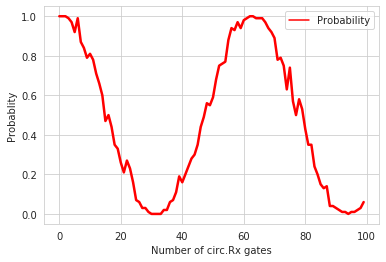

In [50]:
data = pd.DataFrame(res,columns=['Probability'])
plt.xlabel('Number of circ.Rx gates')
plt.ylabel('Probablity')

sns.lineplot(data=data,palette=['red'], linewidth=2.5)

This is how the probability changes upon increasing cirq.rx rotations.